            Word  Count  Compound
65      hospital    115  0.141201
39           not     62 -0.259210
48          good     47  0.710111
59          time     33  0.143015
198      waiting     31 -0.577358
247       doctor     30 -0.096630
254         care     30  0.679277
51          help     29  0.086603
133         well     28  0.530936
168         also     26  0.157831
72         times     25 -0.024304
16          wait     25 -0.422828
167  appointment     24  0.011692
163     friendly     24  0.639988
286      doctors     23  0.645152
161   department     23  0.136548
214       helped     22  0.302477
32         staff     22  0.474727
124           go     22 -0.079118
225       people     21  0.007319
246        great     20  0.764790
113        hours     20 -0.396105
227      nothing     20 -0.210595
130         nice     19  0.742063
64        called     19 -0.275942
              Word  Count  Compound
1256          cons      1   -0.9837
1243      relative      1   -0.9837
1244  pr

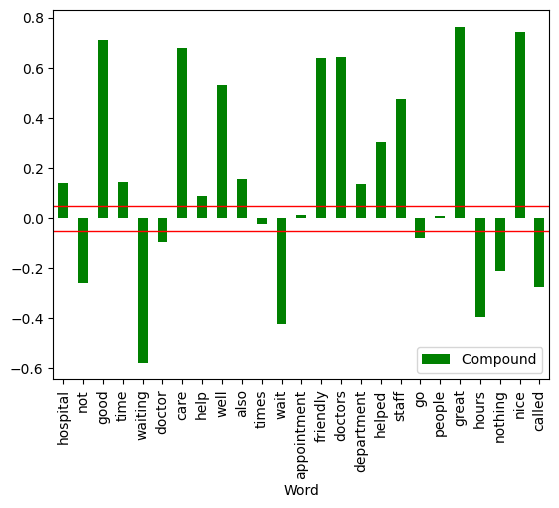

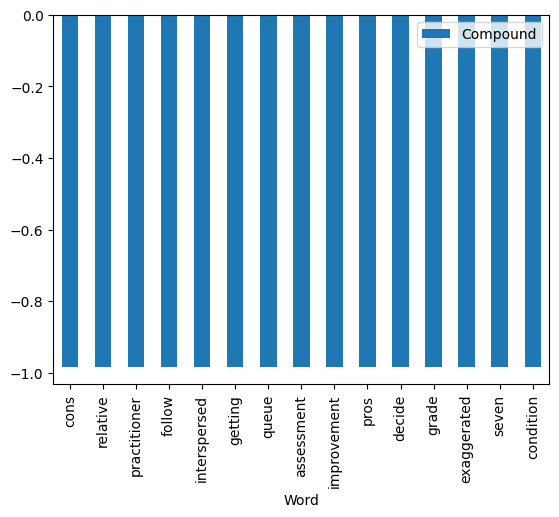

In [2]:
import pandas as pd
from deep_translator import (GoogleTranslator,
                             PonsTranslator,
                             LingueeTranslator,
                             MyMemoryTranslator,
                             YandexTranslator,
                             single_detection,
                             batch_detection)
import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
import CleanupFunctions as clean
import AddedWords
import WordsSentiment

# Haalt info uit csv op.
dfDutch = pd.read_csv("CSVFiles/GoogleReviewsZGVNoEmpty.csv")

dfSentiment = pd.DataFrame.from_dict({
    "id":[],
    "text": [],
    "compound": [],
    "neg":[],
    "neu":[],
    "pos":[],
})

sia = SentimentIntensityAnalyzer()
# Update de woordenlijst, met zelftoegevoegde woorden en het sentiment, bron: https://ithaka.github.io/tdm-notebooks/sentiment-analysis-with-vader.html
sia.lexicon.update(AddedWords.added_words())

#Loop die er voor zorgt dat alle vertaalde reviews wordt uitgeprint
for col_name, review in dfDutch.iterrows():
    translated = GoogleTranslator(source='dutch', target='english').translate(text=dfDutch.loc[col_name]['review_text'])
    textlowercase = clean.convert_to_lowercase(translated)
    textclean = clean.punc_clean(textlowercase)
    textstopword = clean.remove_stopword(textclean)
    tokenized = sent_tokenize(textstopword)
    for line in tokenized:     
        ss = sia.polarity_scores(line)
        compound = ss["compound"]
        dfTemp = pd.DataFrame.from_dict({
                            "id":[col_name],
                            "text": [textstopword],
                            "compound": [compound],
                            "neg":[ss["neg"]],
                            "neu":[ss["neu"]],
                            "pos":[ss["pos"]],
                            })

        WordsSentiment.words_sentiment(compound, line)

    dfSentiment = pd.concat([dfSentiment, dfTemp], ignore_index=True)
    
WordsSentiment.print_graphs()



